In [1]:
# Step 1: Installing  required packages
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("GEOquery")
install.packages("dplyr")
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.26), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'GEOquery'

also installing the dependencies ‘XVector’, ‘matrixStats’, ‘abind’, ‘SparseArray’, ‘BiocGenerics’, ‘statmod’, ‘XML’, ‘R.oo’, ‘R.methodsS3’, ‘MatrixGenerics’, ‘GenomicRanges’, ‘IRanges’, ‘Seqinfo’, ‘S4Arrays’, ‘DelayedArray’, ‘Biobase’, ‘limma’, ‘rentrez’, ‘R.utils’, ‘SummarizedExperiment’, ‘S4Vectors’


Old packages: 'mgcv', 'pkgdown', 'purrr', 'stringr'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#Step 2: Loadign the necessary  packages
library(GEOquery)
library(dplyr)
library(ggplot2)


Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: ‘generics’


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Bioba

In [3]:
#Step 3: Fetching the  dataset from  NCBI GEO database
gset <- getGEO("GSE68849", GSEMatrix = TRUE)[[1]]


Found 1 file(s)

GSE68849_series_matrix.txt.gz



In [4]:
#Step 4: Extracting the Gene Eexpression data
expr_data <- exprs(gset)


In [5]:
#Step 5: Extracting the  gene symbols from feature data
feature_data <- fData(gset) %>% select(Symbol)


In [6]:
#Step 6: Combining the  gene symbols with Gene Epression data
expr_df <- data.frame(Gene = feature_data$Symbol, expr_data)


In [7]:
# Step 7: Cleaning the  gene symbols (remove blanks, keep first if multiple)
expr_df <- expr_df %>%
  filter(Gene != "" & !is.na(Gene)) %>%
  mutate(Gene = sub(" /// .*", "", Gene))


In [8]:
# Step 8: Calculating the  average expression per gene
expr_df <- expr_df %>%
  mutate(avg_expr = rowMeans(select(., -Gene), na.rm = TRUE))


In [9]:
# Step 9: Filtering  for highly expressed genes
high_expr <- expr_df %>%
  filter(avg_expr > 8) %>%
  arrange(desc(avg_expr))


In [10]:
#Step 10: Selecting the  top 10 genes
top10 <- head(high_expr, 10)


In [11]:
# Step 11: Printing the  top 10
print(top10)


                  Gene GSM1684095 GSM1684096 GSM1684097 GSM1684098 GSM1684099
ILMN_1343291    EEF1A1   23599.32   22303.32   25980.17   24776.12   24776.12
ILMN_1814823       FTL   25980.17   26775.34   23338.63   23338.63   25334.86
ILMN_2038776       TXN   24339.67   25980.17   26775.34   26775.34   19909.86
ILMN_1740429       FTL   24776.12   25334.86   22662.96   22303.32   26775.34
ILMN_1683271    TMSB4X   25334.86   23761.31   23761.31   24029.11   25980.17
ILMN_1754990 LOC388720   24029.11   24339.67   24029.11   24339.67   23338.63
ILMN_2331890     RPL41   23060.47   19969.22   22876.35   23761.31   24339.67
ILMN_1725427       B2M   19909.86   18229.82   23060.47   22876.35   16406.39
ILMN_2094718      TPT1   26775.34   23599.32   25334.86   21764.15   23060.47
ILMN_1694742     RPS29   22463.51   18408.21   22463.51   22095.80   23599.32
             GSM1684100 GSM1684101 GSM1684102 GSM1684103 GSM1684104 avg_expr
ILMN_1343291   26775.34   25980.17   25980.17   23599.32   26775.

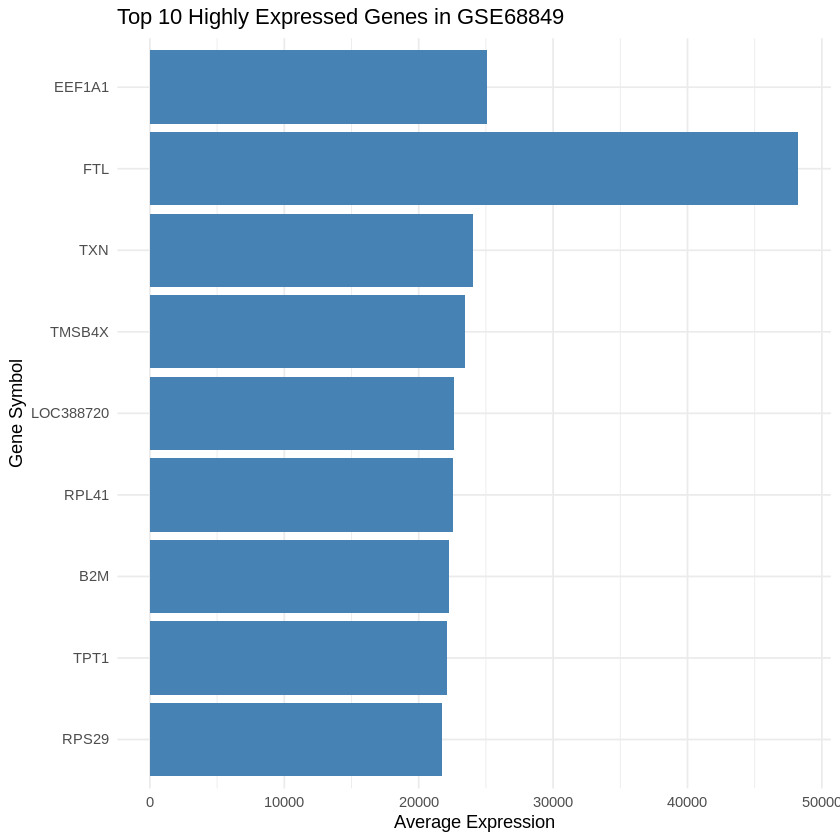

In [12]:
# Step 12: Visualizing the  top genes
ggplot(top10, aes(x = reorder(Gene, avg_expr), y = avg_expr)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Top 10 Highly Expressed Genes in GSE68849",
    x = "Gene Symbol",
    y = "Average Expression"
  ) +
  theme_minimal()


**Interpretation of the Top 10 Highly Expressed Genes Plot (Step 12):**

This plot visualizes the average expression levels of the top 10 genes identified in the previous steps, providing insights into which genes are most actively expressed in the dataset. Let's break down the components of the plot:

*   **`ggplot(top10, aes(x = reorder(Gene, avg_expr), y = avg_expr))`**: This part of the code initiates the plot using the `ggplot2` library in R. It specifies that the `top10` data frame will be used for plotting. The `aes()` function maps variables from the data to aesthetic properties of the plot.
    *   `x = reorder(Gene, avg_expr)`: This maps the `Gene` column to the x-axis. The `reorder()` function is used to order the genes on the x-axis based on their `avg_expr` values in ascending order. This makes the bar plot more informative by arranging the genes from lowest to highest average expression.
    *   `y = avg_expr`: This maps the `avg_expr` column (average expression) to the y-axis. The height of each bar will represent the average expression level of the corresponding gene.

*   **`geom_bar(stat = "identity", fill = "steelblue")`**: This layer adds the bar geometry to the plot.
    *   `stat = "identity"`: This tells `geom_bar` to use the values in the `avg_expr` column directly as the heights of the bars, rather than counting occurrences.
    *   `fill = "steelblue"`: This sets the fill color of the bars to "steelblue".

*   **`coord_flip()`**: This function flips the coordinate system, so the x-axis becomes the y-axis and the y-axis becomes the x-axis. This is done to create a horizontal bar plot, which is often easier to read when you have many categories (genes in this case) with long labels.

*   **`labs(...)`**: This layer adds labels and a title to the plot.
    *   `title = "Top 10 Highly Expressed Genes in GSE68849"`: Sets the main title of the plot.
    *   `x = "Gene Symbol"`: Sets the label for the x-axis (which is now the vertical axis due to `coord_flip()`).
    *   `y = "Average Expression"`: Sets the label for the y-axis (which is now the horizontal axis).

*   **`theme_minimal()`**: This applies a minimal theme to the plot, which generally removes unnecessary elements like background shading and simplifies grid lines, resulting in a clean and visually appealing plot.

**Overall Interpretation:**

The horizontal bar plot displays the top 10 most highly expressed genes in the GSE68849 dataset. The length of each bar directly corresponds to the average expression level of that gene across all samples in the dataset. By visualizing this, we can quickly identify which genes have the highest overall activity in the biological context of this dataset. The `reorder()` function ensures that the genes are ordered by their average expression, making it easy to see the ranking from highest to lowest expression. This plot is a clear and concise way to summarize the findings from the gene expression analysis and highlight the most prominent genes.

**Summary of the Gene Expression Analysis Workflow:**

This notebook performed a series of steps to identify and visualize the top 10 most highly expressed genes from the GSE68849 dataset.

1.  **Installation of Packages (Step 1):** We began by installing the necessary R packages: `BiocManager` for Bioconductor packages, `GEOquery` to fetch data from the GEO database, `dplyr` for data manipulation, and `ggplot2` for data visualization.
2.  **Loading Packages (Step 2):** The installed packages were then loaded into the R environment to make their functions available for use.
3.  **Fetching the Dataset (Step 3):** We fetched the gene expression dataset with the accession number "GSE68849" from the NCBI GEO database using the `getGEO` function.
4.  **Extracting Expression Data (Step 4):** The raw gene expression data was extracted from the fetched dataset object.
5.  **Extracting Gene Symbols (Step 5):** Gene symbols, which are the common names for genes, were extracted from the feature data associated with the dataset.
6.  **Combining Data (Step 6):** The extracted gene symbols were combined with the gene expression data into a single data frame.
7.  **Cleaning Gene Symbols (Step 7):** The gene symbols were cleaned to remove any blank entries or multiple symbols listed for a single gene, keeping only the first symbol if multiple were present.
8.  **Calculating Average Expression (Step 8):** The average expression level for each gene across all samples in the dataset was calculated.
9.  **Filtering for High Expression (Step 9):** Genes with an average expression level greater than 8 were filtered to focus on highly expressed genes.
10. **Selecting Top 10 Genes (Step 10):** The top 10 genes with the highest average expression were selected from the filtered list.
11. **Printing Top 10 Genes (Step 11):** The data for the top 10 genes, including their expression levels and average expression, was printed to the console.
12. **Visualizing Top 10 Genes (Step 12):** A horizontal bar plot was generated to visualize the average expression levels of the top 10 genes, making it easy to compare their expression and identify the most highly expressed genes.

In conclusion, this analysis successfully retrieved gene expression data, processed it to identify highly expressed genes, and visualized the top contenders, providing valuable insights into the most active genes in the GSE68849 dataset.